# Bitcoin Data Analysis

## Time Series Forcasting

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from statsmodels import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss

## Overview

we are doing predictions for Bitcoin's future price, we are performing a 30-day forecasting period for the bitcoins price based on the past year's price fluctuations. each time that this file loads it will automatically download the latest Bitcoin data from Yahoo financial API which we can easily access with "yfinance" package in python. keeping that in mind that based on the changes in the Bitcoin price our models may or may not need parameter adjustments to get the most accurate results.

In [46]:
# KPSS test Function from statsmodels package
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

We begin with importing the data from Yahoo Finance and plotting the price of Bitcoin in the past year which started at around 21000 and now it is about 26000 with a gradual increase over the year. the data is not seasonal but it looks very cyclical and there is a trend.

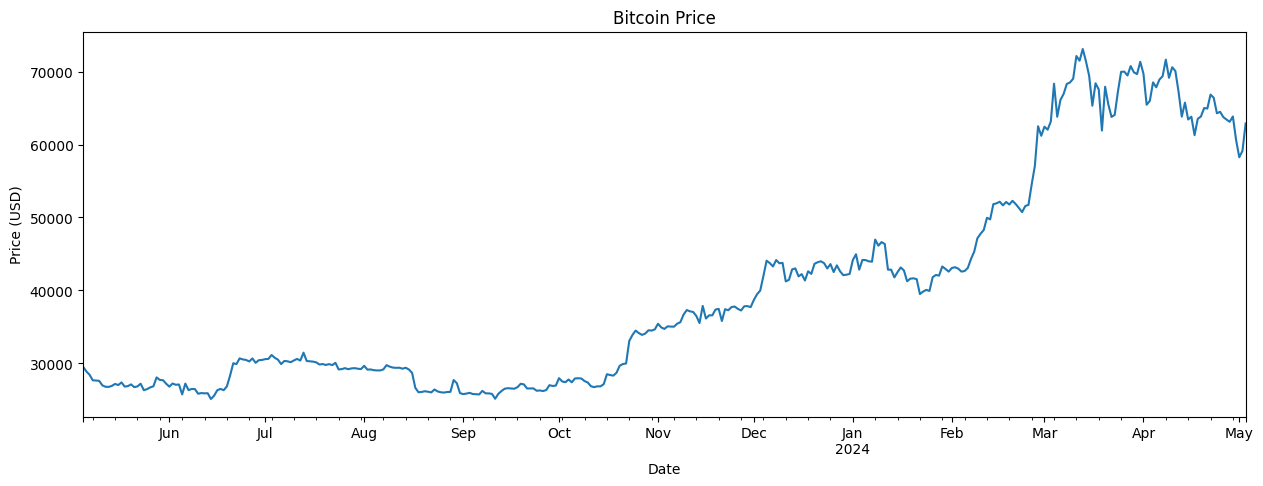

In [47]:
from datetime import timedelta

bitcoin_data = yf.download('BTC-USD',
                           start=datetime.now() - timedelta(days=365),
                           end=datetime.now(),
                           progress=False)
bitcoin_data.reset_index(inplace=True)

bitcoin_data = bitcoin_data[['Date', 'Close']]
bitcoin_data.columns = ['Date', 'Price']
bitcoin_data.set_index('Date', inplace=True)

bitcoin_data['Price'].plot(figsize=(15, 5))
plt.title('Bitcoin Price')
plt.ylabel('Price (USD)')
plt.show()

## ARIMA Model



to check the data for cyclicality and the trend, we plot ACF and PACF  to analyze our data visually we can see that the ACF plot shows that the data is highly cyclical as we assumed earlier. Hence it means that we need to do differencing on our data to make it stationary for building an ARIMA model.

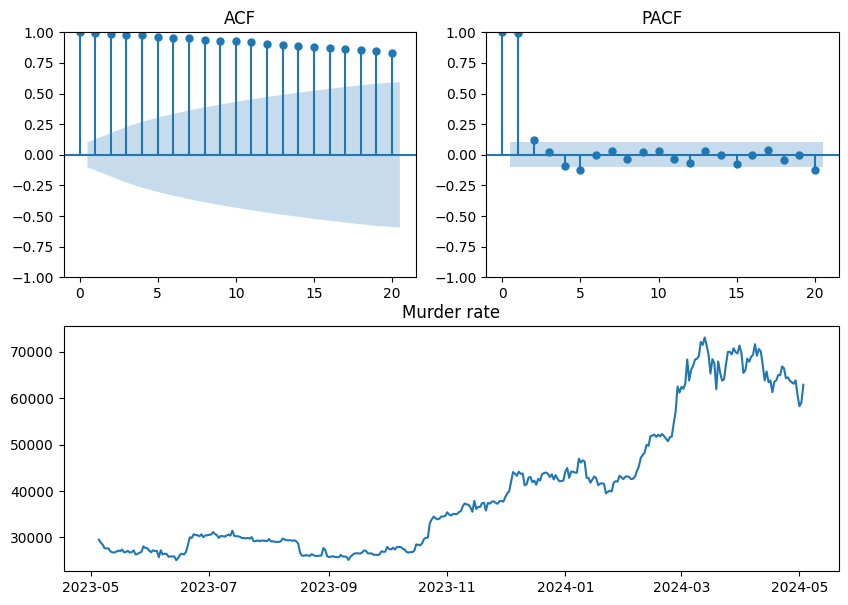

In [48]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(212)
ax1.plot(bitcoin_data)
ax1.set_title('Murder rate')
ax2 = plt.subplot(221)
ax2=plot_acf(bitcoin_data, lags=20, ax=plt.gca(), title='ACF')
ax3 = plt.subplot(222)
ax3=plot_pacf(bitcoin_data, lags=20, ax=plt.gca(), title='PACF')

we can say by looking at the data that data is not stationary but we run the KPSS test to see for sure that the test statistic is higher than critical value which we reject the $H_0$.

In [49]:
kpss_test(bitcoin_data)

Results of KPSS Test:
Test Statistic            2.601549
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/var/folders/v3/w6z18hvd0w15zyjyz0hkmvc80000gn/T/ipykernel_43336/507152304.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


so the measure we take next is to take differencing of our current data to make it stationary for the ARIMA model. and the we plot ACF and PACF to see the correlations between lags. and we can see the data is stationary and there is no correlation between the variables. 

In [50]:
bitcoin_data_diff=bitcoin_data.diff().dropna()

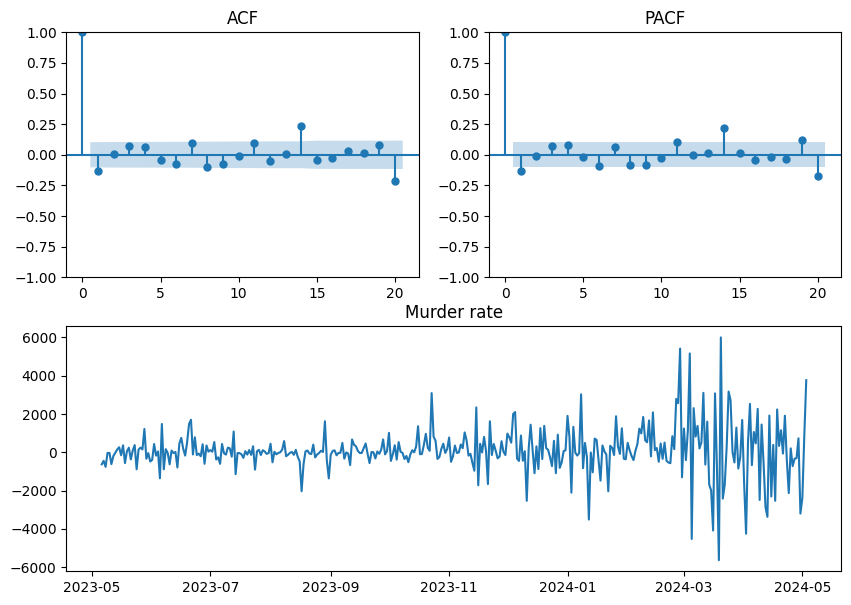

In [51]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(212)
ax1.plot(bitcoin_data_diff)
ax1.set_title('Murder rate')
ax2 = plt.subplot(221)
ax2=plot_acf(bitcoin_data_diff, lags=20, ax=plt.gca(), title='ACF')
ax3 = plt.subplot(222)
ax3=plot_pacf(bitcoin_data_diff, lags=20, ax=plt.gca(), title='PACF')

we again will perform KPSS test to the test statistic which is lower than 10% critical value and the p-value is high so we retain the $H_0$ and accept that data is staitionary.

In [52]:
kpss_test(bitcoin_data_diff)

Results of KPSS Test:
Test Statistic           0.21434
p-value                  0.10000
Lags Used                2.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/var/folders/v3/w6z18hvd0w15zyjyz0hkmvc80000gn/T/ipykernel_43336/507152304.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


next, we want to do the ARIMA Model, and because there are no correlations between values using both ACF and PACF after first differencing choose P D Q as respectively 1,1,0 and build the model. and do a forecasting of 30 dates after today. we print the actual forecasted values here to see and also make a chart to visualize the forecasted values.

            predicted_mean
2024-05-04    62529.021670
2024-05-05    62563.586999
2024-05-06    62560.275705
2024-05-07    62560.592921
2024-05-08    62560.562532
2024-05-09    62560.565444
2024-05-10    62560.565165
2024-05-11    62560.565191
2024-05-12    62560.565189
2024-05-13    62560.565189
2024-05-14    62560.565189
2024-05-15    62560.565189
2024-05-16    62560.565189
2024-05-17    62560.565189
2024-05-18    62560.565189
2024-05-19    62560.565189
2024-05-20    62560.565189
2024-05-21    62560.565189
2024-05-22    62560.565189
2024-05-23    62560.565189
2024-05-24    62560.565189
2024-05-25    62560.565189
2024-05-26    62560.565189
2024-05-27    62560.565189
2024-05-28    62560.565189
2024-05-29    62560.565189
2024-05-30    62560.565189
2024-05-31    62560.565189
2024-06-01    62560.565189
2024-06-02    62560.565189


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


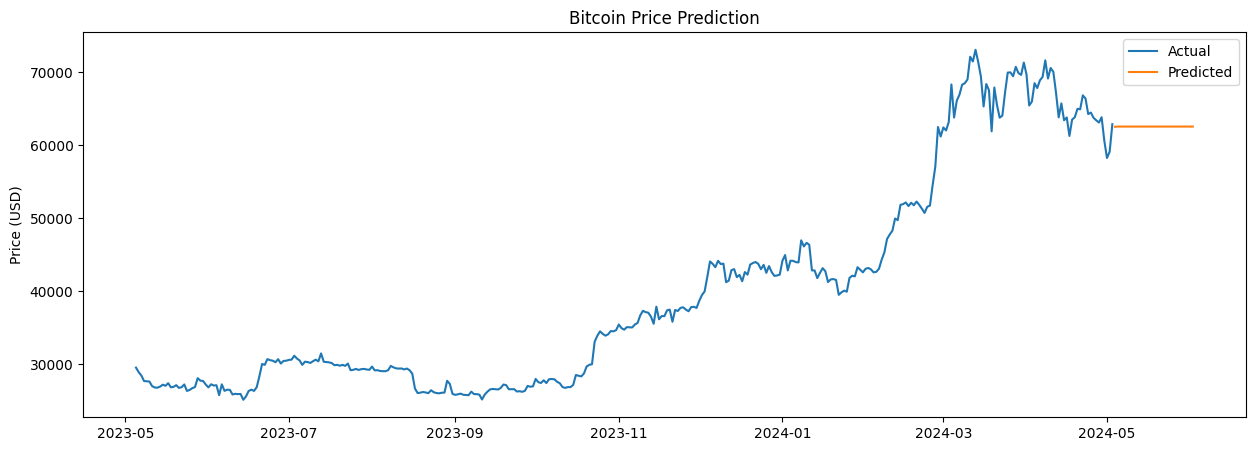

In [53]:

# Perform time series analysis using ARIMA model
model = ARIMA(bitcoin_data,
              order=(1, 1, 0))
model_fit = model.fit()

# Make future predictions
future_predictions = pd.DataFrame(model_fit.forecast(steps=30))
print(future_predictions)

# Plot the future predictions
plt.figure(figsize=(15,5))
plt.plot(bitcoin_data, label='Actual')
#plt.plot(model_fit.fittedvalues)
plt.plot(future_predictions, label='Predicted')
plt.title('Bitcoin Price Prediction')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

and for the model summary we have sigma 2 as the coefficient which is significant and the auto regression lag 1 which is not significant.

In [54]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  365
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3100.781
Date:                Sat, 04 May 2024   AIC                           6205.563
Time:                        10:45:29   BIC                           6213.357
Sample:                    05-05-2023   HQIC                          6208.661
                         - 05-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0958      0.026     -3.646      0.000      -0.147      -0.044
sigma2      1.467e+06   5.54e+04     26.467      0.000    1.36e+06    1.58e+06
Ljung-Box (L1) (Q):                   0.69   Jarque-

the value of root mean squer error is also as follows:

In [55]:
print("RMSE for ARIMA Model: ", np.sqrt((model_fit.resid**2).mean()))

RMSE for ARIMA Model:  1963.0947638928694


Text(0.5, 1.0, '30 day pridictions')

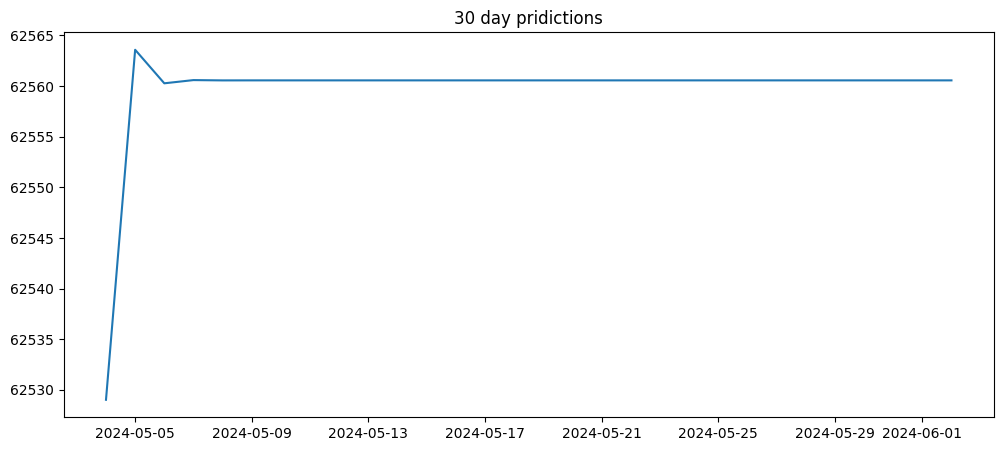

In [56]:
plt.figure(figsize=(12,5))
plt.plot(future_predictions)
plt.title('30 day pridictions')

now we want to check and see which model parameters does Auto Arima model from the package "pmdarima" chooses for an optimal model.

In [57]:

from pmdarima.arima import auto_arima

AAmodel=auto_arima(bitcoin_data,
                   start_P=0,
                   start_q=0,
                   max_d=2)
print(AAmodel.arparams)

<bound method ARIMA.arparams of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>


The model auto arima chose is the order (0,1,0) which did not consider lag 1 autoregression as significant which was true and we can see the value of AIC is slightly lower than our model. The value of RMSE is also the same as our model.

In [58]:
print(AAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3099.406
Date:                Sat, 04 May 2024   AIC                           6204.813
Time:                        10:45:29   BIC                           6216.504
Sample:                    05-05-2023   HQIC                          6209.459
                         - 05-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    110.9867     57.074      1.945      0.052      -0.877     222.850
ma.L1         -0.1041      0.026     -3.979      0.000      -0.155      -0.053
sigma2      1.465e+06   5.56e+04     26.364      0.0

In [59]:
print("RMSE for ARIMA Model: ", np.sqrt((AAmodel.resid()**2).mean()))

RMSE for ARIMA Model:  1955.703102744907


## Test for Seasonality

We already know that our there is no seasonality in Bitcoin's price change in the past year but we are seeing a repetitive pattern in our data which brings us to the point that we wanted to try and see what is the pattern in our data. So we performed an exponential smoothing model using additive trend and seasonality and let the algorithm estimate the parameters, doing seasonal periods of less than 150 days. we stored the RMSE for each model for later comparison and see which seasonal period gives us the lowest RMSE in term of seasonality. and we plot and print the result to see the lowest value which is 116.

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL

rmse=[]
aic=[]
for k in range(3,150):
    modelexp=ExponentialSmoothing(bitcoin_data,
                              trend='add',
                              seasonal='add',
                              damped_trend=True,
                              initialization_method='estimated',
                              seasonal_periods=k).fit()

    rmse.append(np.sqrt((modelexp.resid**2).mean()))

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-pac

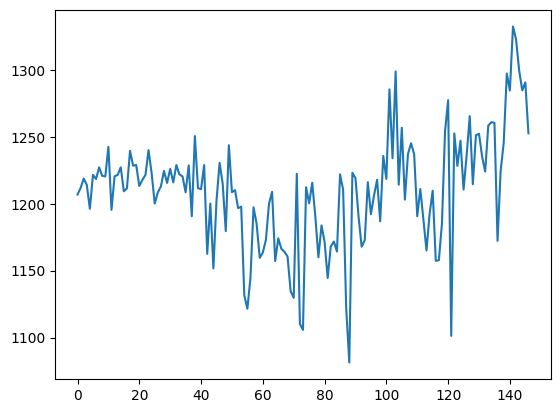

Optimal Seasonal Period:  88


In [61]:
plt.plot(rmse)
plt.show()
print('Optimal Seasonal Period: ',np.argmin(rmse))

We will run the STL model and plot the model to see the seasonality in the data, which we can see with a gradual decrease and increase in the variance there can be similarity in patterns each 116 days!

In [65]:
stl_model = STL(bitcoin_data,seasonal=89).fit()

stl_model.plot()

ValueError: endog must have ndim <= 1

# Exponential Smoothing and Holt's Method:

after we understood that there is no seasonality and we have a trend we perform an exponential smoothing model with a damped trend and let the model decide the parameter values we forecast for the next 31 days which resulted in a downward trend which if we visually compare the trend with the past we can see a similar downward pattern in May 2023 up to July.

2024-05-04    62293.230097
2024-05-05    62274.111984
2024-05-06    62255.185051
2024-05-07    62236.447389
2024-05-08    62217.897102
2024-05-09    62199.532319
2024-05-10    62181.351184
2024-05-11    62163.351859
2024-05-12    62145.532529
2024-05-13    62127.891391
2024-05-14    62110.426665
2024-05-15    62093.136586
2024-05-16    62076.019408
2024-05-17    62059.073401
2024-05-18    62042.296855
2024-05-19    62025.688074
2024-05-20    62009.245381
2024-05-21    61992.967115
2024-05-22    61976.851631
2024-05-23    61960.897303
2024-05-24    61945.102517
2024-05-25    61929.465680
2024-05-26    61913.985211
2024-05-27    61898.659546
2024-05-28    61883.487139
2024-05-29    61868.466455
2024-05-30    61853.595978
2024-05-31    61838.874206
2024-06-01    61824.299652
2024-06-02    61809.870843
2024-06-03    61795.586322
Freq: D, dtype: float64


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


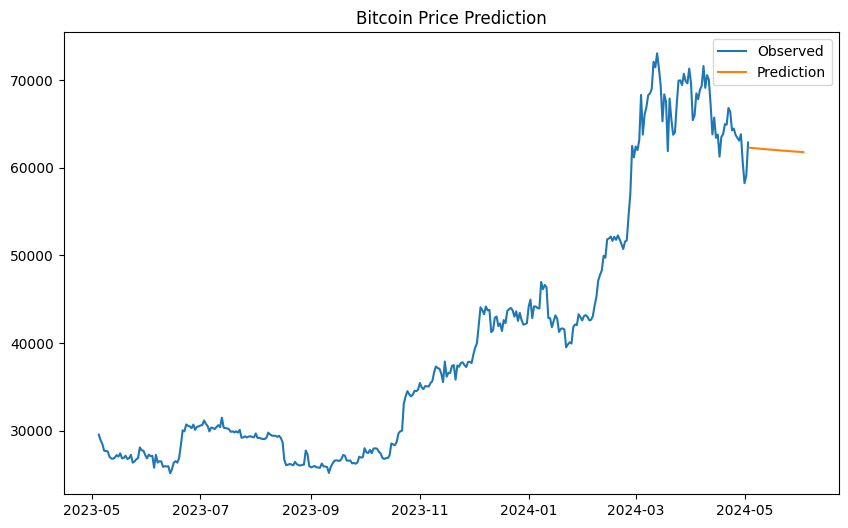

In [66]:
modelexp=ExponentialSmoothing(bitcoin_data,
                              trend='add',
                              damped_trend=True,
                              initialization_method='estimated').fit()

modelexp.summary()

expforecast=modelexp.forecast(steps=31)
print(expforecast)
plt.figure(figsize=(10,6))
plt.plot(bitcoin_data, label='Observed')
plt.plot(expforecast, label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()

the results for this model are very promising which we can see next when we calculated the RMSE for this model it is the best performance among all the models we already tried. and we also can see a significant drop in values of AIC, BIC and AICc.

In [67]:
print(modelexp.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Price   No. Observations:                  365
Model:             ExponentialSmoothing   SSE                      532371051.303
Optimized:                         True   AIC                           5190.428
Trend:                         Additive   BIC                           5209.928
Seasonal:                          None   AICC                          5190.742
Seasonal Periods:                  None   Date:                 Sat, 04 May 2024
Box-Cox:                          False   Time:                         10:46:40
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8535714                alpha                 True
smoothing_trend            0.02188

In [68]:
print('RMSE for this model is: ', np.sqrt((modelexp.resid**2).mean()))

RMSE for this model is:  1207.7047757986015


## Exponential Smoothing

we do this model once more using "heuristic" initialization method and smoothing level and smoothing trend values of 0.1 to get a smoother model fit to see the trend. As a remark we expect to see a possible higher RMSE because it is not the optimal model.

2024-05-04    61023.872678
2024-05-05    60728.659813
2024-05-06    60436.399077
2024-05-07    60147.060948
2024-05-08    59860.616200
2024-05-09    59577.035900
2024-05-10    59296.291403
2024-05-11    59018.354351
2024-05-12    58743.196669
2024-05-13    58470.790564
2024-05-14    58201.108520
2024-05-15    57934.123297
2024-05-16    57669.807926
2024-05-17    57408.135708
2024-05-18    57149.080213
2024-05-19    56892.615273
2024-05-20    56638.714982
2024-05-21    56387.353694
2024-05-22    56138.506019
2024-05-23    55892.146820
2024-05-24    55648.251214
2024-05-25    55406.794563
2024-05-26    55167.752480
2024-05-27    54931.100817
2024-05-28    54696.815670
2024-05-29    54464.873375
2024-05-30    54235.250503
2024-05-31    54007.923860
2024-06-01    53782.870483
2024-06-02    53560.067640
2024-06-03    53339.492826
Freq: D, dtype: float64
RMSE for this model is:  2250.7005487888787


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


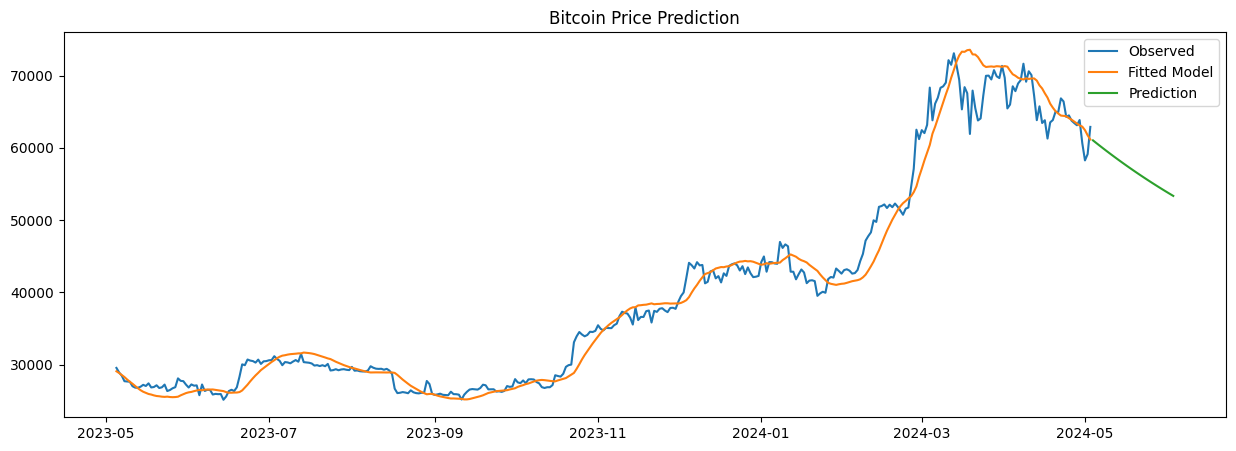

In [69]:
modelexp=ExponentialSmoothing(bitcoin_data,
                              trend='add',
                              damped_trend=True,
                              initialization_method='heuristic').fit(smoothing_level=0.1,
                                                                     smoothing_trend=0.1)

modelexp.summary()

expforecast=modelexp.forecast(steps=31)
print(expforecast)

plt.figure(figsize=(15,5))
plt.plot(bitcoin_data, label='Observed')
plt.plot(modelexp.fittedvalues, label='Fitted Model')
plt.plot(expforecast, label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()

print('RMSE for this model is: ', np.sqrt((modelexp.resid**2).mean()))

## Holt's Method
we performed 3 different methods the first one is Holt's linear method, the next one is the exponential method and last but not least Holt's damped trend model. we build all the models with smoothing level and smoothing trend values of 0.1 to compare them visually and using RMSE we can see that the lowest RMSE belongs to the damped trend.

RMSE linear model 2340.883269606914
RMSE exponential model 2501.9807388784393
RMSE damped model 2250.7005487888787


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


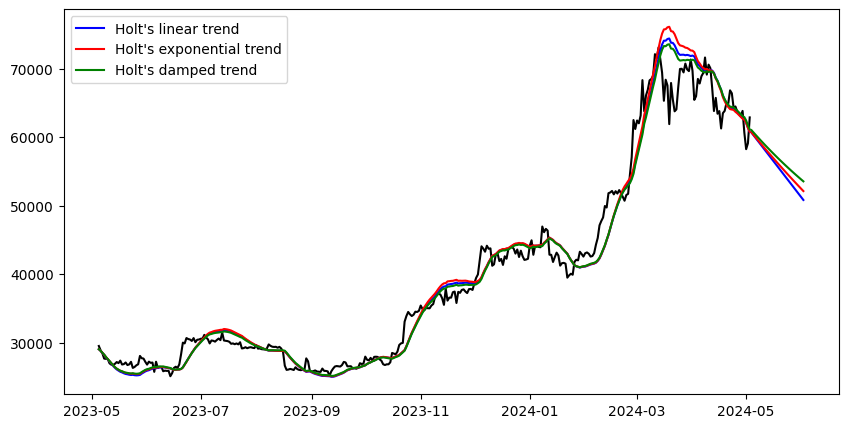

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
holt_1=Holt(bitcoin_data,
                     initialization_method='heuristic').fit(smoothing_level=0.1,
                                                            smoothing_trend=0.1,
optimized=False)
H_forecast1= holt_1.forecast(30).rename("Holt's linear trend")
holt_2=Holt(bitcoin_data, exponential=True,
                     initialization_method='heuristic').fit(smoothing_level=0.1,
                                                            smoothing_trend=0.1,
optimized=False)
H_forecast2= holt_2.forecast(30).rename("Holt's exponential trend")
holt_3=Holt(bitcoin_data, damped_trend=True,
                     initialization_method='heuristic').fit(smoothing_level=0.1,
                                                            smoothing_trend=0.1)
H_forecast3= holt_3.forecast(30).rename("Holt's damped trend")
plt.figure(figsize=(10,5))
plt.plot(bitcoin_data, color='black')
plt.plot(holt_1.fittedvalues, color='blue')
(line1,) = plt.plot(H_forecast1,color='blue')
plt.plot(holt_2.fittedvalues, color='red')
(line2,) = plt.plot(H_forecast2,color='red')
plt.plot(holt_3.fittedvalues, color='green')
(line3,) = plt.plot(H_forecast3,color='green')
plt.legend([line1,line2,line3],[H_forecast1.name,H_forecast2.name,H_forecast3.name])
print('RMSE linear model',np.sqrt(((holt_1.resid)**2). mean()))
print('RMSE exponential model',np.sqrt(((holt_2. resid)**2).mean()))
print('RMSE damped model',np.sqrt(((holt_3.resid)**2). mean()))

## ETS Model

Lastly, we will try an ETS model with an additive damped trend and let the algorithm estimate the parameters 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  9.11476D+00    |proj g|=  8.99900D-01

At iterate    1    f=  8.63690D+00    |proj g|=  4.58464D-01

At iterate    2    f=  8.57265D+00    |proj g|=  2.89647D-01

At iterate    3    f=  8.53112D+00    |proj g|=  5.80142D-02

At iterate    4    f=  8.52248D+00    |proj g|=  5.52282D-02

At iterate    5    f=  8.51681D+00    |proj g|=  7.35490D-02
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    6    f=  8.51323D+00    |proj g|=  6.30784D-03

At iterate    7    f=  8.51322D+00    |proj g|=  2.97788D-03

At iterate    8    f=  8.51322D+00    |proj g|=  1.75984D-03

At iterate    9    f=  8.51322D+00    |proj g|=  4.61853D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored 

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


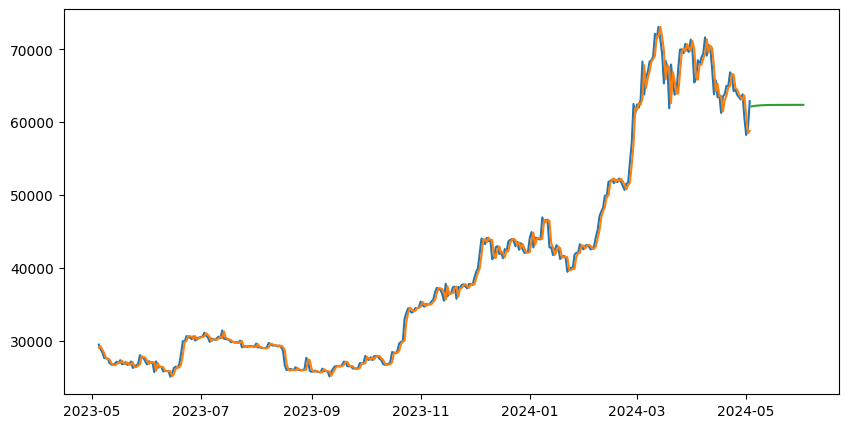

In [71]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

ets = ETSModel(bitcoin_data['Price'],
               trend='add',
               error='add',
               damped_trend=True,
               initialization_method='estimated').fit()

ets_pred=ets.forecast(30)
plt.figure(figsize=(10,5))
plt.plot(bitcoin_data)
plt.plot(ets.fittedvalues)
plt.plot(ets_pred)

ETS model performed the best among all the models considering RMSE which we can see in the last code chunk, and from the chart we saw earlier predicts the price to continue the downward trend and settles around the value of 25500 in the next 30 days.

In [72]:
print(ets_pred)


2024-05-04    62173.782273
2024-05-05    62216.290481
2024-05-06    62250.297048
2024-05-07    62277.502302
2024-05-08    62299.266505
2024-05-09    62316.677867
2024-05-10    62330.606957
2024-05-11    62341.750229
2024-05-12    62350.664846
2024-05-13    62357.796540
2024-05-14    62363.501895
2024-05-15    62368.066179
2024-05-16    62371.717607
2024-05-17    62374.638749
2024-05-18    62376.975662
2024-05-19    62378.845193
2024-05-20    62380.340817
2024-05-21    62381.537317
2024-05-22    62382.494517
2024-05-23    62383.260277
2024-05-24    62383.872885
2024-05-25    62384.362971
2024-05-26    62384.755040
2024-05-27    62385.068695
2024-05-28    62385.319619
2024-05-29    62385.520359
2024-05-30    62385.680950
2024-05-31    62385.809423
2024-06-01    62385.912202
2024-06-02    62385.994425
Freq: D, Name: simulation, dtype: float64


In [73]:

print(ets.summary())

                                 ETS Results                                  
Dep. Variable:                  Price   No. Observations:                  365
Model:                      ETS(AAdN)   Log Likelihood               -3107.324
Date:                Sat, 04 May 2024   AIC                           6226.647
Time:                        10:47:21   BIC                           6250.047
Sample:                    05-05-2023   HQIC                          6235.946
                         - 05-03-2024   Scale                      1452146.753
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.8113      0.020     41.532      0.000       0.773       0.850
smoothing_trend     0.0634        nan        nan        nan         nan         nan
damping_trend       0.8000      

In [74]:
print("RMSE for ETS Model: ", np.sqrt((ets.resid**2).mean()))

RMSE for ETS Model:  1205.0505187673723


# Conclusion 

We saw that the ETS model performed best considering RMSE and predicted a more constant trend in the next 30 days but the first exponential smoothing method that we did we received a slightly higher RMSE from the model but the values of AIC, BIC and AICc were very lower than ETS model. then we choose the best model to be an exponential smoothing or Holt's damped trend model.